In [15]:
import pandas as pd
import numpy as np 
import re
# import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split    

In [16]:
df = pd.read_csv('../data_samples/train_ins.csv')
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [17]:
df.shape

(188318, 132)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [19]:
cat_inx = list({ idx for idx, name in enumerate(df.columns) if 'cat' in name})
cont_inx = list({ idx for idx, name in enumerate(df.columns) if 'cont' in name})

<Figure size 2000x1600 with 0 Axes>

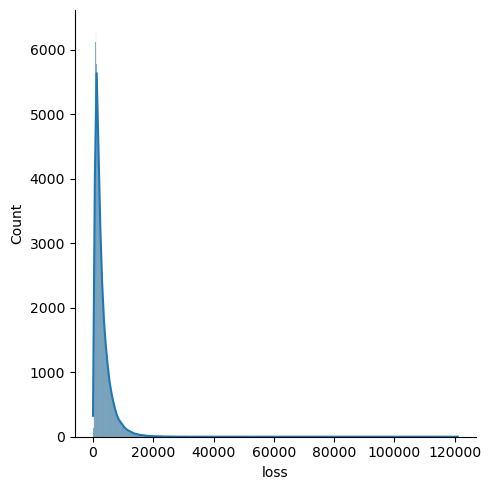

In [20]:
plt.figure(figsize=(20, 16))
sns.displot(df['loss'] , kde=True)

<Figure size 2000x1600 with 0 Axes>

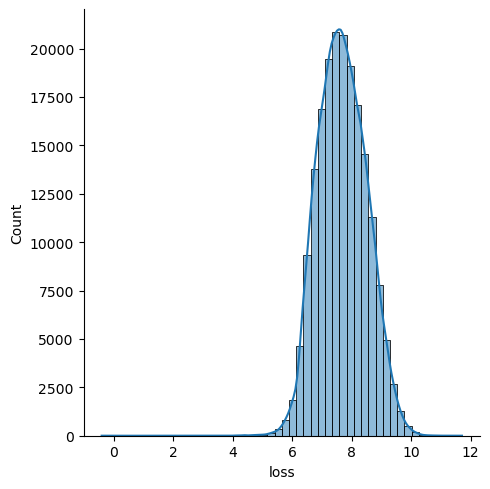

In [21]:
plt.figure(figsize=(20, 16))
sns.displot(np.log(df['loss']), bins=50 , kde=True)

In [22]:

X = df.drop(['id' , 'loss'] , axis= 1)
y= np.log(df['loss'])
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [23]:
model = CatBoostRegressor(iterations=120, learning_rate=0.05, depth=6, verbose=10,eval_metric='MAE', random_seed=42)

In [24]:
del X
del y
del df

In [33]:
inx = np.asarray(cat_inx) -1
inx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

In [39]:
result = model.fit(X_train , y_train , inx , eval_set = (X_test , y_test))


0:	learn: 0.6484500	test: 0.6477345	best: 0.6477345 (0)	total: 92.9ms	remaining: 11.1s
10:	learn: 0.5634903	test: 0.5630738	best: 0.5630738 (10)	total: 906ms	remaining: 8.97s
20:	learn: 0.5194419	test: 0.5191213	best: 0.5191213 (20)	total: 1.63s	remaining: 7.68s
30:	learn: 0.4931625	test: 0.4926046	best: 0.4926046 (30)	total: 2.34s	remaining: 6.71s
40:	learn: 0.4770067	test: 0.4764080	best: 0.4764080 (40)	total: 3.05s	remaining: 5.88s
50:	learn: 0.4656275	test: 0.4651325	best: 0.4651325 (50)	total: 3.78s	remaining: 5.11s
60:	learn: 0.4575963	test: 0.4572561	best: 0.4572561 (60)	total: 4.5s	remaining: 4.36s
70:	learn: 0.4521302	test: 0.4518046	best: 0.4518046 (70)	total: 5.22s	remaining: 3.6s
80:	learn: 0.4476863	test: 0.4474116	best: 0.4474116 (80)	total: 5.94s	remaining: 2.86s
90:	learn: 0.4441183	test: 0.4438968	best: 0.4438968 (90)	total: 6.66s	remaining: 2.12s
100:	learn: 0.4414068	test: 0.4412407	best: 0.4412407 (100)	total: 7.38s	remaining: 1.39s
110:	learn: 0.4389978	test: 0.438

In [44]:
np.exp(result.best_score_['learn']['MAE'])

1.5484985116328884